# First Autoencoder  

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)

## Data 생성
- 3 차원 data 생성

In [4]:
m = 100
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5

data = np.empty((m, 3))    # (100, 3)
data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)

data.shape

(100, 3)

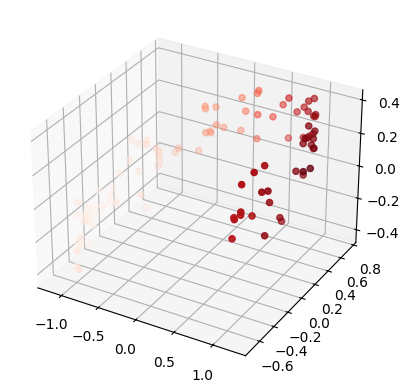

In [5]:
# 3차원 data 시각화
X_train = data #- data.mean(axis=0, keepdims=0)
ax = plt.axes(projection='3d') # 3차원으로 투영하겠
ax.scatter3D(X_train[:, 0], X_train[:, 1],
             X_train[:, 2], c=X_train[:, 0], cmap='Reds');

## Autoencoder model 작성

- 3 차원 data 를 2 차원으로 차원 축소

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [7]:
# 3 차원 => 2 차원
# 방법 1
model = Sequential([
	Dense(2, input_shape=(3,)),  # 여러 차원이 들어올 수 있기 떄문에 튜플
	Dense(3)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 방법 2 : 나중에 인코더만 뽑아서 쓸 수 있기 때문에 인코더와 디코더로 나눠서 진행한 것
# 각각 sequential로 하여 두개의 모델을 생성한다.
encoder = Sequential([Dense(2, input_shape=(3,))])
decoder = Sequential([Dense(3, input_shape=(2,))])

autoencoder = Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 2)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_2 (Sequential)            │ (None, 3)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (68.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.1))

In [10]:
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.3934
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1767 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0901 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0519 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0343 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0207 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0161 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0141 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0135 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0127 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0124 
Epoch 16/200
4/4 ━━

## encoder output 시각화

- 학습시킨 encoder 를 이용하여 data를 차원 축소

In [11]:
encodings = encoder.predict(X_train)
encodings.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(100, 2)

- encoder output을 시각화

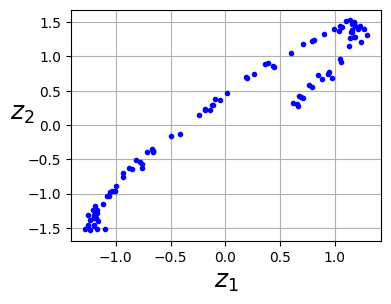

In [12]:
fig = plt.figure(figsize=(4,3))
plt.plot(encodings[:,0], encodings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

## Decoder 를 이용한 data 복원

- 학습된 decoder를 이용하여 data 복원

In [13]:
decodings = decoder.predict(encodings)

decodings.shape

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


(100, 3)

- 복원된 data 시각화

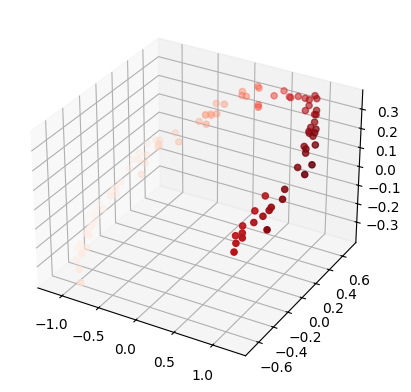

In [14]:
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1],
             decodings[:, 2], c=decodings[:, 0], cmap='Reds');

# Simple and Stacked Autoencoder with MNIST - Dense

- fashion_mnist dataset 을 이용한 deep autoencoder 생성


- Mnist dataset 의 손글씨체를 encoding 후 decoding 하여 복원  

`plot_model` 사용을 위해서 `conda install pydot`, `conda install graphviz` 로 graphviz 와 pydot 설치

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

In [16]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()
X_train.shape

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(60000, 28, 28)

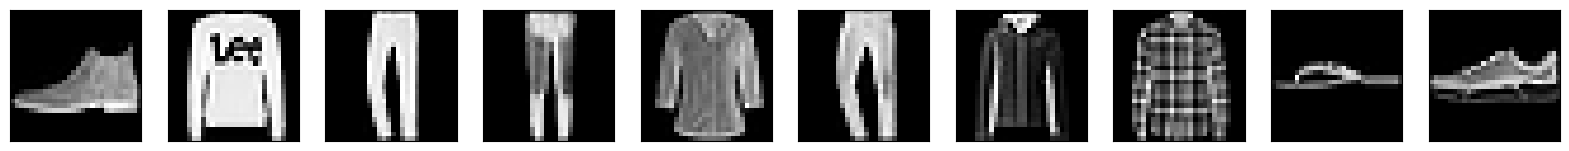

In [17]:
# sample image 시각화
fig, ax = plt.subplots(1, 10, figsize=(20, 4))
for i in range(10):
    ax[i].imshow(X_test[i], cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [18]:
# data normalization : 0~ 1 사이의 값으로 바뀜
X_train = X_train / 255.
X_test = X_test / 255.

In [19]:
# 2차원 이미지를 1차원으로 변경
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## stacked autoencoder 작성

In [20]:
input = Input(shape=(784,))

In [21]:
# stacked autoencoder : functional API 사용 (함수형으로)
x = Dense(units=128, activation='relu')(input) # units : 뉴런의 개수 => 생략 가능
x = Dense(units=64, activation='relu')(x)
encoder = Dense(units=32, activation='relu')(x) # 2개를 가지고 있기 때문에 dense 필요

x = Dense(units=64, activation='relu')(encoder) # 인코더의 출력을 디코더의 입력으로 넣음
x = Dense(units=128, activation='relu')(x)
decoder = Dense(units=784, activation='sigmoid')(x) # 784개의 픽셀로 복원 필요 (0~1 사이의 값으로 normalize했으므로 sigmoid 사용필요)

# autoencoder model
encoder_model = Model(inputs=input, outputs=encoder)
autoencoder = Model(inputs=input, outputs=decoder)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')


In [22]:
autoencoder.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

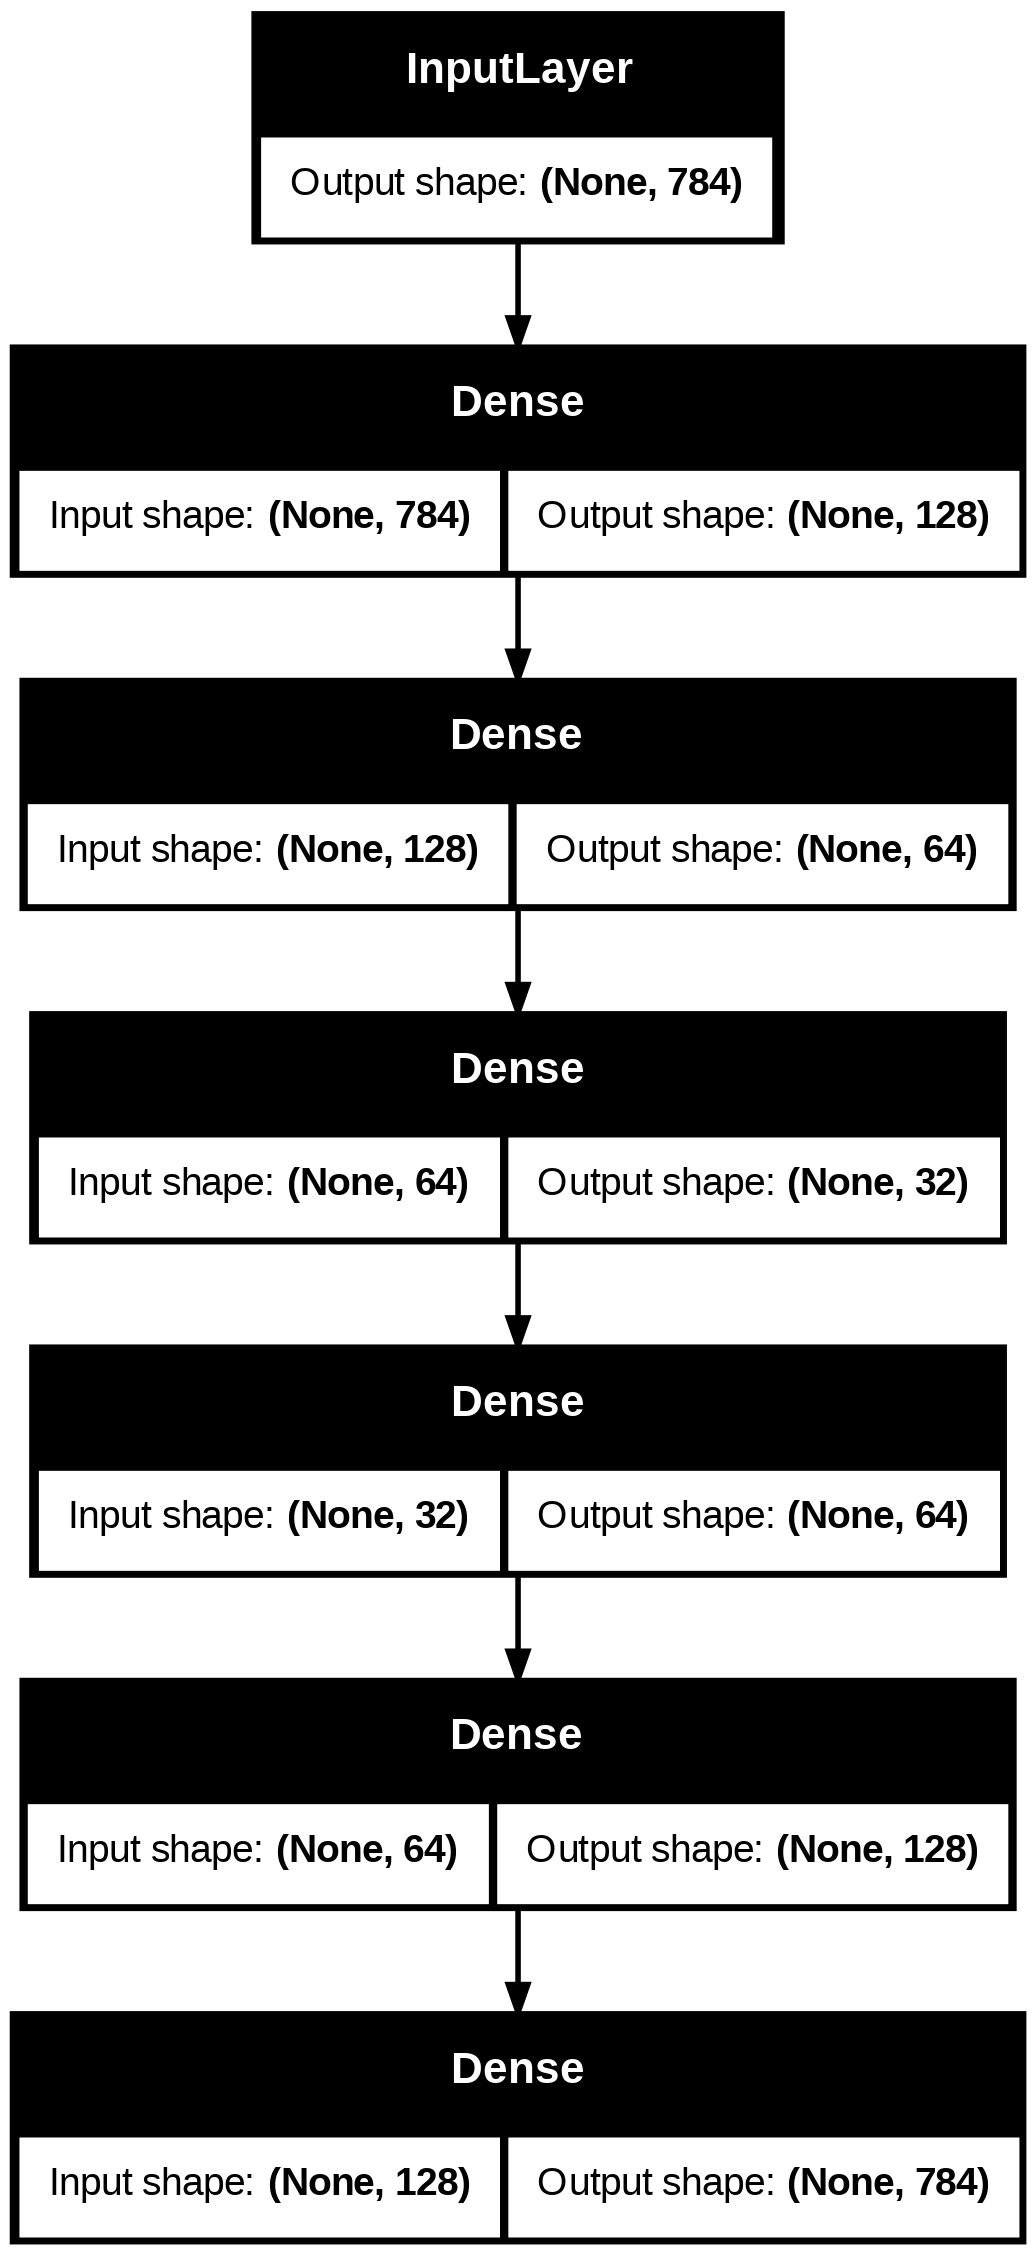

In [23]:
plot_model(autoencoder, show_shapes=True)

In [24]:
history = autoencoder.fit(X_train, X_train, epochs=50, shuffle=True,
              batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.4557 - val_loss: 0.3189
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3131 - val_loss: 0.3066
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3027 - val_loss: 0.3021
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2978 - val_loss: 0.2982
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2944 - val_loss: 0.2951
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2918 - val_loss: 0.2927
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2899 - val_loss: 0.2909
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2881 - val_loss: 0.2893
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2867 - val_loss: 0.2880
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2854 - val_loss: 0.2870
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2843 - val_loss: 0.2861
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/ste

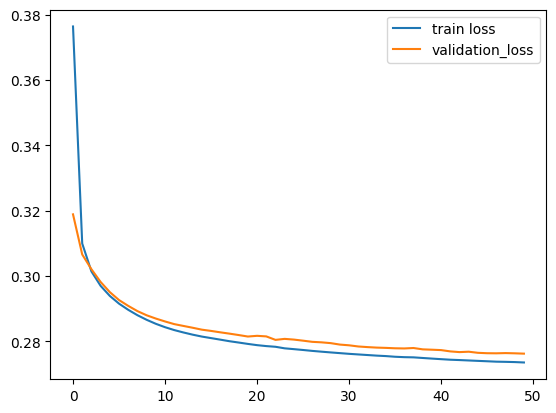

In [25]:
# 손실 시각화
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.legend()

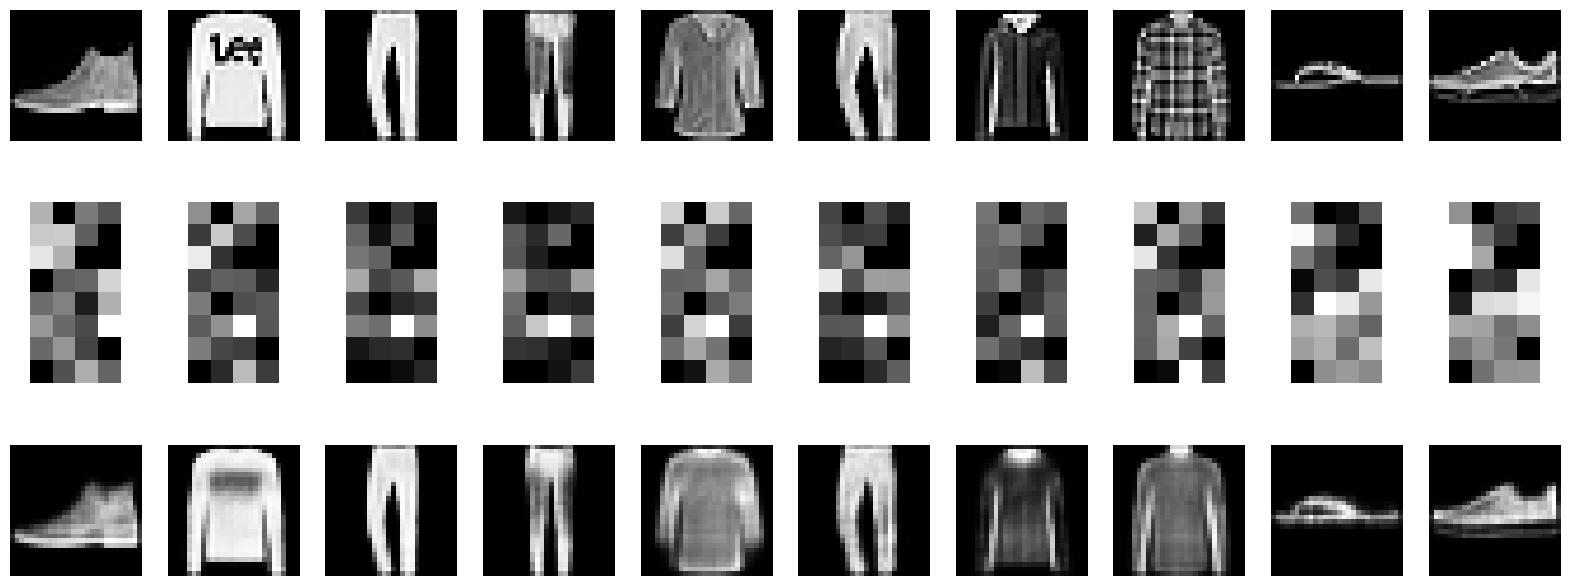

In [26]:
# 결과 이미지 시각화
fig, ax = plt.subplots(3, 10, figsize=(20, 8))
for i in range(10):
    ax[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray') #784 픽셀을 다시 28x28의 원래로 되돌려야함

    img = np.expand_dims(X_test[i], axis=0)

    ax[1, i].imshow(encoder_model.predict(img, verbose=0).reshape(8, 4), cmap='gray')
    ax[2, i].imshow(autoencoder.predict(img, verbose=0).reshape(28, 28), cmap='gray')

    ax[0, i].axis('off')
    ax[1, i].axis('off')
    ax[2, i].axis('off')